In [2]:
# Import MNIST data, which contains sample hand written numbers
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from t

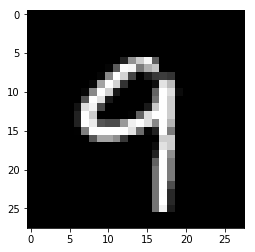

In [3]:
# Display sample image to get a better understanding
plt.imshow(np.reshape(mnist.train.images[8], [28, 28]), cmap='gray')
plt.show()

In [4]:
'''
Train and test the data
Each image is 28x28, so the input shape is 28x28 = 784
'''

# Parameters
learning_rate = 0.1
num_steps = 500
batch_size = 128
display_step = 100

# Network parameters
n_hidden_1 = 10  # 1st layer number of neurons
n_hidden_2 = 10  # 2nd layer number of neurons
num_input = 784  # MNIST data input (img size=28x28)
num_classes = 10 # MNIST total classes (0-9 digits)

# tf graph input
X = tf.placeholder("float", [None, num_input])
Y = tf.placeholder("float", [None, num_classes])

In [7]:
# Store layers weight & bias
weights = {
    "h1": tf.Variable(tf.random_normal([num_input, n_hidden_1])),
    "h2": tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    "out": tf.Variable(tf.random_normal([n_hidden_2, num_classes]))
}

biases = {
    "b1": tf.Variable(tf.random_normal([n_hidden_1])),
    "b2": tf.Variable(tf.random_normal([n_hidden_2])),
    "out": tf.Variable(tf.random_normal([num_classes]))
}

In [10]:
'''
Describe 3-layer neural network with 10 units
'''

# Create model
def neural_net(x):
    # Hidden fully connected layer with 10 neurons
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    # Hidden fully connected layer with 10 neurons
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    # Output fully connected layer with a neuron for each class
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer

In [11]:
'''
Preparation
'''

# Construct model
logits = neural_net(X)

# Define loss and optimizer
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)

# Evaluate model
correct_pred = tf.equal(tf.argmax(logits,1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# Initialize the variables (Default values)
init = tf.global_variables_initializer()

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



In [12]:
'''
Training
'''

with tf.Session() as sess:
    
    # Run the initializer
    sess.run(init)
    
    for step in range(1, num_steps + 1):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        # Run optimization op
        sess.run(train_op, feed_dict={X: batch_x, Y: batch_y})
        if step % display_step == 0 or step == 1:
            
            # Calc batch loss and accuracy
            loss, acc = sess.run([loss_op, accuracy], feed_dict={X:batch_x, Y:batch_y})
            print("Step " + str(step) + ", Minibatch loss=" + "{:.4f}".format(loss) + ", Training Accuracy=" + "{:.3f}".format(acc))
    
    print ("Optimization finished")
    
    # Calc accuracy for MNIST test images
    print("Testing accuracy", sess.run(accuracy, feed_dict={X:mnist.test.images, Y:mnist.test.labels}))

Step 1, Minibatch loss=149.1492, Training Accuracy=0.109
Step 100, Minibatch loss=1.2098, Training Accuracy=0.773
Step 200, Minibatch loss=0.6159, Training Accuracy=0.828
Step 300, Minibatch loss=0.5151, Training Accuracy=0.867
Step 400, Minibatch loss=0.4640, Training Accuracy=0.852
Step 500, Minibatch loss=0.3021, Training Accuracy=0.922
Optimization finished
Testing accuracy 0.8658
